In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.model_selection import train_test_split


In [2]:
### multi-class classification 
# Binary classification = one thing or another (e.g. cat vs dog)
# Multi-class classification = more than two classes (e.g. cat vs dog vs bird)

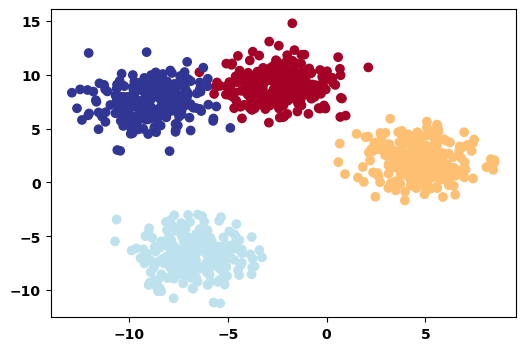

In [3]:
# set hyperparameters  for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42


# 1. Create multi-class dataset
a = make_blobs()
X_blob, y_blob = make_blobs(n_samples=1000, 
                            centers=NUM_CLASSES, 
                            n_features=NUM_FEATURES,
                            cluster_std=1.5, # give the clausters a little shake up
                            random_state=RANDOM_SEED)

# 2. turn data into tensor

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# Split into train and test

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                         y_blob,
                                                                         test_size=0.2, 
                                                                         random_state=RANDOM_SEED)


# plot data (visualize)

plt.figure(figsize=(6, 4))
plt.scatter(X_blob[:, 0], X_blob[:, 1],
            c=y_blob, 
            cmap= plt.cm.RdYlBu)

In [4]:
### Building a multi-class classification model in PyTorch
## Create device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [5]:
## Build a multi_class classification

class BlobModel(nn.Module):
    def __init__(self, input_feature, output_feature, hidden_units= 8):
        """
        Initialize multi-class classification model.

        Args:
            input_feature (int): Number of input features.
            output_feature (int): Number of output features (classes).
            hidden_units (int, optional): Number of hidden units. Defaults to 8.
        Returns:
            
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_feature, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_feature)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)
    
## Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_feature=2,      # number of input features
                    output_feature=4,     # number of classes
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [6]:
# create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# create an optimizer for multi_class classification
optimizer = torch.optim.SGD(params = model_4.parameters(),
                            lr= 0.01)

In [7]:
# getting pred probs for mult-class model- check the outputs
# lets get some raw outputs of our model - logits
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)


y_logits[:10]  ### compare with y_blob_test[:10]--- should have same format

tensor([[ 0.2312, -0.3683, -0.5375, -0.1774],
        [ 0.2081, -1.4904, -0.4157,  0.0484],
        [-0.3274, -1.4601, -0.6495, -0.2916],
        [ 0.0314, -0.3062, -0.4881, -0.1162],
        [ 0.1716, -0.7336, -0.6705, -0.2079],
        [ 0.2000, -1.7057, -0.4620,  0.0560],
        [-0.2232, -1.2313, -0.7274, -0.1816],
        [ 0.2438, -0.8599, -0.4478, -0.1491],
        [-0.4436, -1.8082, -0.5829, -0.4533],
        [ 0.2266, -0.8059, -0.5143, -0.1702]])

In [8]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [9]:
# in order to evaluate and train and test our model, 
# we need to convert models outputs (logits) to pred-probs and then to pred-labels:
# logits -> pred probs (use torch.softmax) -> pred labels (take the argmax of the pred-probs - torch.argmax)
y_pred_probs = torch.softmax(y_logits, dim=1)


print(y_logits[:10])

print(y_pred_probs[:10])

tensor([[ 0.2312, -0.3683, -0.5375, -0.1774],
        [ 0.2081, -1.4904, -0.4157,  0.0484],
        [-0.3274, -1.4601, -0.6495, -0.2916],
        [ 0.0314, -0.3062, -0.4881, -0.1162],
        [ 0.1716, -0.7336, -0.6705, -0.2079],
        [ 0.2000, -1.7057, -0.4620,  0.0560],
        [-0.2232, -1.2313, -0.7274, -0.1816],
        [ 0.2438, -0.8599, -0.4478, -0.1491],
        [-0.4436, -1.8082, -0.5829, -0.4533],
        [ 0.2266, -0.8059, -0.5143, -0.1702]])
tensor([[0.3735, 0.2051, 0.1732, 0.2482],
        [0.3889, 0.0712, 0.2084, 0.3315],
        [0.3243, 0.1045, 0.2350, 0.3362],
        [0.3154, 0.2250, 0.1876, 0.2721],
        [0.3969, 0.1605, 0.1710, 0.2716],
        [0.3952, 0.0588, 0.2038, 0.3422],
        [0.3321, 0.1212, 0.2006, 0.3462],
        [0.3988, 0.1323, 0.1997, 0.2692],
        [0.3209, 0.0820, 0.2792, 0.3178],
        [0.3992, 0.1422, 0.1903, 0.2684]])


In [10]:
torch.sum(y_pred_probs[0])
torch.max(y_pred_probs[0])   # should find the index that corresponds to this max

tensor(0.3735)

In [11]:
# Convert our models pred-probs to pred-labels
y_pred_labels = torch.argmax(y_pred_probs, dim=1)
y_pred_labels   # compare it with y_blob_test
# y_blob_test

tensor([0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
        0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0,
        0, 0, 3, 0, 0, 0, 3, 0])

In [12]:
def accuracy_fn(y_true, y_pred):
    correct = (y_true == y_pred).sum().item() # or torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_true)) * 100
    return acc

In [13]:
y_blob_train.dtype

torch.int64

In [14]:
### Now creating a training loop for a multi-class classification model
# Fit the multi-class to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 101 

# Put data to the target device

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)


# loop through data

for epoch in range(epochs):

    # Training step
    model_4.train()
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)


    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true = y_blob_train,
                      y_pred = y_pred)
    

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing code
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true = y_blob_test,
                                y_pred = test_preds)
        
    ## Print what is happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss.item():.4f} | Train Acc: {acc:.2f}% | Test Loss: {test_loss.item():.4f} | Test Acc: {test_acc:.2f}%")


Epoch: 0 | Train Loss: 1.2249 | Train Acc: 25.12% | Test Loss: 1.2013 | Test Acc: 24.50%
Epoch: 10 | Train Loss: 1.0928 | Train Acc: 75.38% | Test Loss: 1.0671 | Test Acc: 79.50%
Epoch: 20 | Train Loss: 0.9744 | Train Acc: 86.25% | Test Loss: 0.9471 | Test Acc: 88.00%
Epoch: 30 | Train Loss: 0.8659 | Train Acc: 88.38% | Test Loss: 0.8367 | Test Acc: 91.50%
Epoch: 40 | Train Loss: 0.7669 | Train Acc: 90.38% | Test Loss: 0.7366 | Test Acc: 94.50%
Epoch: 50 | Train Loss: 0.6771 | Train Acc: 92.12% | Test Loss: 0.6472 | Test Acc: 95.50%
Epoch: 60 | Train Loss: 0.5968 | Train Acc: 93.75% | Test Loss: 0.5680 | Test Acc: 96.50%
Epoch: 70 | Train Loss: 0.5260 | Train Acc: 94.50% | Test Loss: 0.4989 | Test Acc: 97.00%
Epoch: 80 | Train Loss: 0.4639 | Train Acc: 95.50% | Test Loss: 0.4390 | Test Acc: 97.00%
Epoch: 90 | Train Loss: 0.4106 | Train Acc: 96.25% | Test Loss: 0.3876 | Test Acc: 97.00%
Epoch: 100 | Train Loss: 0.3647 | Train Acc: 96.88% | Test Loss: 0.3433 | Test Acc: 97.50%


In [15]:
### Making evaluating predictions

model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[ 0.4222,  1.0039, -1.6222, -1.5701],
        [-0.4947, -2.9025, -0.9242,  1.3328],
        [-1.2338, -2.9622,  1.4734, -1.5522],
        [-0.2065,  0.8654, -1.3178, -0.9023],
        [ 0.8254,  0.3492, -1.7177, -1.7655],
        [-0.6631, -3.3744, -1.0718,  1.6002],
        [-1.0510, -2.3655,  1.0582, -1.3842],
        [ 0.7186, -0.6094, -1.0954, -0.9525],
        [-1.7036, -3.7048,  1.7589, -1.7045],
        [ 0.7841, -0.2594, -1.2699, -1.2383]])

In [16]:
# go from logits to pred-probs
y_pred_probs = torch.softmax(y_logits, dim=1)

y_pred_probs[:10]

tensor([[0.3273, 0.5856, 0.0424, 0.0446],
        [0.1256, 0.0113, 0.0818, 0.7813],
        [0.0592, 0.0105, 0.8872, 0.0431],
        [0.2106, 0.6151, 0.0693, 0.1050],
        [0.5635, 0.3500, 0.0443, 0.0422],
        [0.0881, 0.0059, 0.0586, 0.8474],
        [0.0978, 0.0263, 0.8059, 0.0701],
        [0.6188, 0.1640, 0.1009, 0.1164],
        [0.0294, 0.0040, 0.9373, 0.0294],
        [0.6201, 0.2184, 0.0795, 0.0821]])

In [17]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [18]:
# go from preds to pred-probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [19]:
torch.manual_seed(42)
from helper_functions import plot_decision_boundary

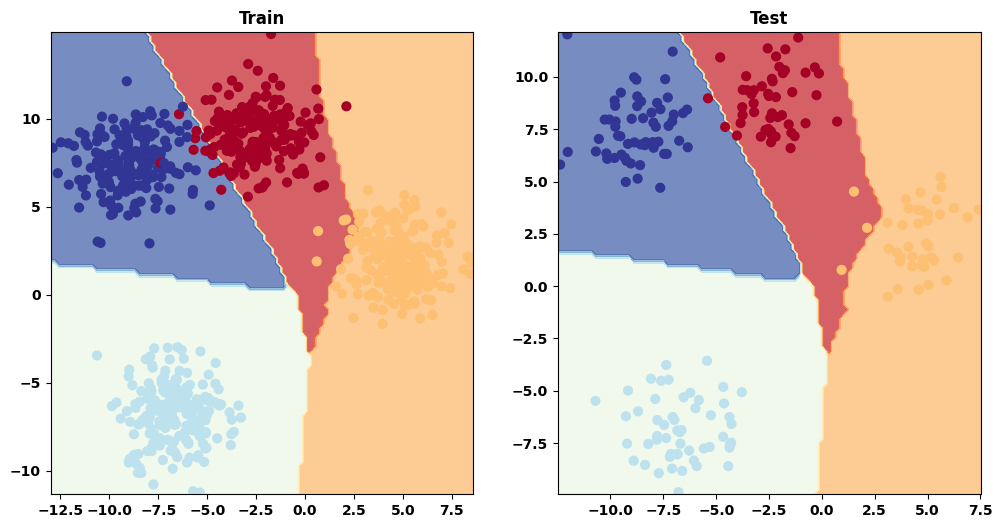

In [20]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## A few more Classification metrics
* Accuracy - out of 100 samples, how many does our model get rigth 
`torchmetrics.Accuracy()`
* Precision - `torchmetrics.Precision()`
* Recall - `torchmetrices.Recall()`
* F1_score - `torchmetrics.F1Score()`
* confusion - `torchmetrics.confusion_matrix()`
* Classification report `torchmetrics.Classification_report()`
See this for when to use accuracy/recall: 
https://medium.com/data-science/beyond-accuracy-precision-and-recall-3da06bea9f6c


In [32]:
import torchmetrics
from torchmetrics import Accuracy, Recall, F1Score

torchmetric_accuracy = Accuracy(num_classes=NUM_CLASSES, task='multiclass').to(device)
torchmetric_recall = Recall(num_classes=NUM_CLASSES, average='macro', task='multiclass').to(device)
torchmetric_f1 = F1Score(num_classes=NUM_CLASSES, average='macro', task='multiclass').to(device)


In [35]:
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9750)